In [1]:
import pandas as pd  
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import MaxNLocator
import seaborn as sns 

we start with a synthetic dataset with 2 variables only

In [2]:
from sklearn.datasets import make_blobs

# create blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

print(X)
print(y)

[[-1.06705283e+00  9.24306355e+00]
 [ 1.08654318e+00 -6.94815805e+00]
 [-2.30970265e+00  5.84969440e+00]
 [-1.59728965e+00  8.45369045e+00]
 [-5.79816711e+00 -3.78405528e+00]
 [-2.29833776e+00 -4.66005371e+00]
 [-1.68210799e+00  1.12843423e+01]
 [-7.38296450e-01 -5.20135260e+00]
 [-1.92048345e-01 -6.45318764e+00]
 [-6.37920287e+00 -2.17672355e+00]
 [-5.12054803e+00 -2.91449176e+00]
 [-4.22297649e+00  9.04719945e+00]
 [-2.67815731e+00 -2.32828819e+00]
 [-3.02994109e+00  1.86959382e+00]
 [-5.73938121e+00 -7.25648845e-01]
 [-1.99427571e+00  4.28616868e+00]
 [-2.89522086e+00  1.10222354e+01]
 [-1.11286937e+00  1.03086380e+01]
 [-5.19987051e+00 -1.59879364e+00]
 [-4.75916597e+00 -1.97047767e+00]
 [-6.76865308e+00 -3.56907573e+00]
 [-2.65715781e+00  3.33763714e+00]
 [-4.61722463e+00  1.06373187e+01]
 [-1.43729337e+00  1.12137736e+01]
 [-1.98068787e+00  9.73142838e+00]
 [-1.47838268e+00  4.02156675e+00]
 [-3.74580344e+00  9.15545625e+00]
 [-5.51090509e-01 -2.19802594e+00]
 [-2.68015629e+00  5

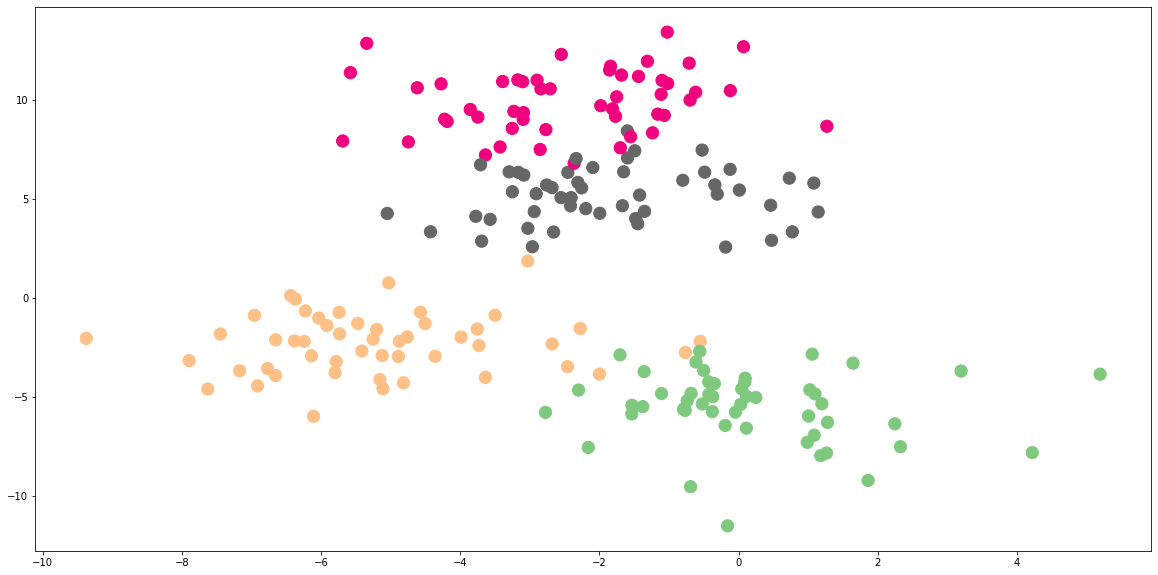

In [3]:
# plot data
plt.figure(figsize=(20,10))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Accent', s=150)
plt.show()

# Partitioning algorithms

In [4]:
# apply k-Means
from sklearn.cluster import KMeans

from sklearn import metrics
# from sklearn.metrics import pairwise_distances


# silhouette: 1=good, 0=overlap, -1=bad
# Within Cluster Sum of Squares: lower is better

def eval_WCSS(X, label):
    
    df = pd.DataFrame(data=X,index=label)
    centroids = df.groupby(level=0).mean()

    WCSS = 0
    for clust, centr in centroids.iterrows():

        points = df[df.index == clust]
        SS = 0
        for _, p in points.iterrows():
            SS += sum((p.values-centr.values)**2)
        WCSS += SS
        
    return WCSS, centroids.values

def cluster_kmeans(df, nclust):
    
    kmeans = KMeans(n_clusters=nclust, random_state=0).fit(df)
    label = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sil=metrics.silhouette_score(df, label, metric='euclidean', random_state=0)
#     wcss = kmeans.inertia_    # this is already provided for k-Means
    wcss, _ = eval_WCSS(X, label)
    
    return sil, wcss, label, centroids

cluster_kmeans(X, 4)

(0.5280677534400235,
 916.3952117958332,
 array([1, 2, 3, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 3, 0, 3, 1, 1, 0, 0, 0, 3,
        1, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 2, 2, 0, 0, 0, 3, 3, 1, 0, 3, 3,
        2, 2, 1, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 0, 0, 3, 2, 2, 1, 2, 2, 1,
        2, 3, 1, 1, 2, 0, 1, 2, 3, 3, 0, 3, 3, 2, 0, 3, 0, 0, 0, 0, 1, 2,
        1, 0, 2, 1, 2, 3, 3, 0, 2, 3, 2, 3, 0, 2, 3, 1, 3, 2, 3, 2, 0, 1,
        2, 0, 1, 1, 0, 3, 1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 3, 3, 2, 0, 2,
        2, 3, 1, 3, 2, 1, 1, 0, 1, 3, 3, 2, 0, 1, 2, 3, 2, 0, 1, 0, 3, 2,
        2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 0, 0, 0, 3, 2, 2, 2, 2, 0, 3, 2, 3,
        0, 2, 1, 3, 2, 3, 3, 1, 0, 2, 0, 1, 3, 2, 3, 3, 0, 3, 2, 1, 0, 3,
        0, 1]),
 array([[-5.56465793, -2.34988939],
        [-2.40167949, 10.17352695],
        [ 0.05161133, -5.35489826],
        [-1.92101646,  5.21673484]]))

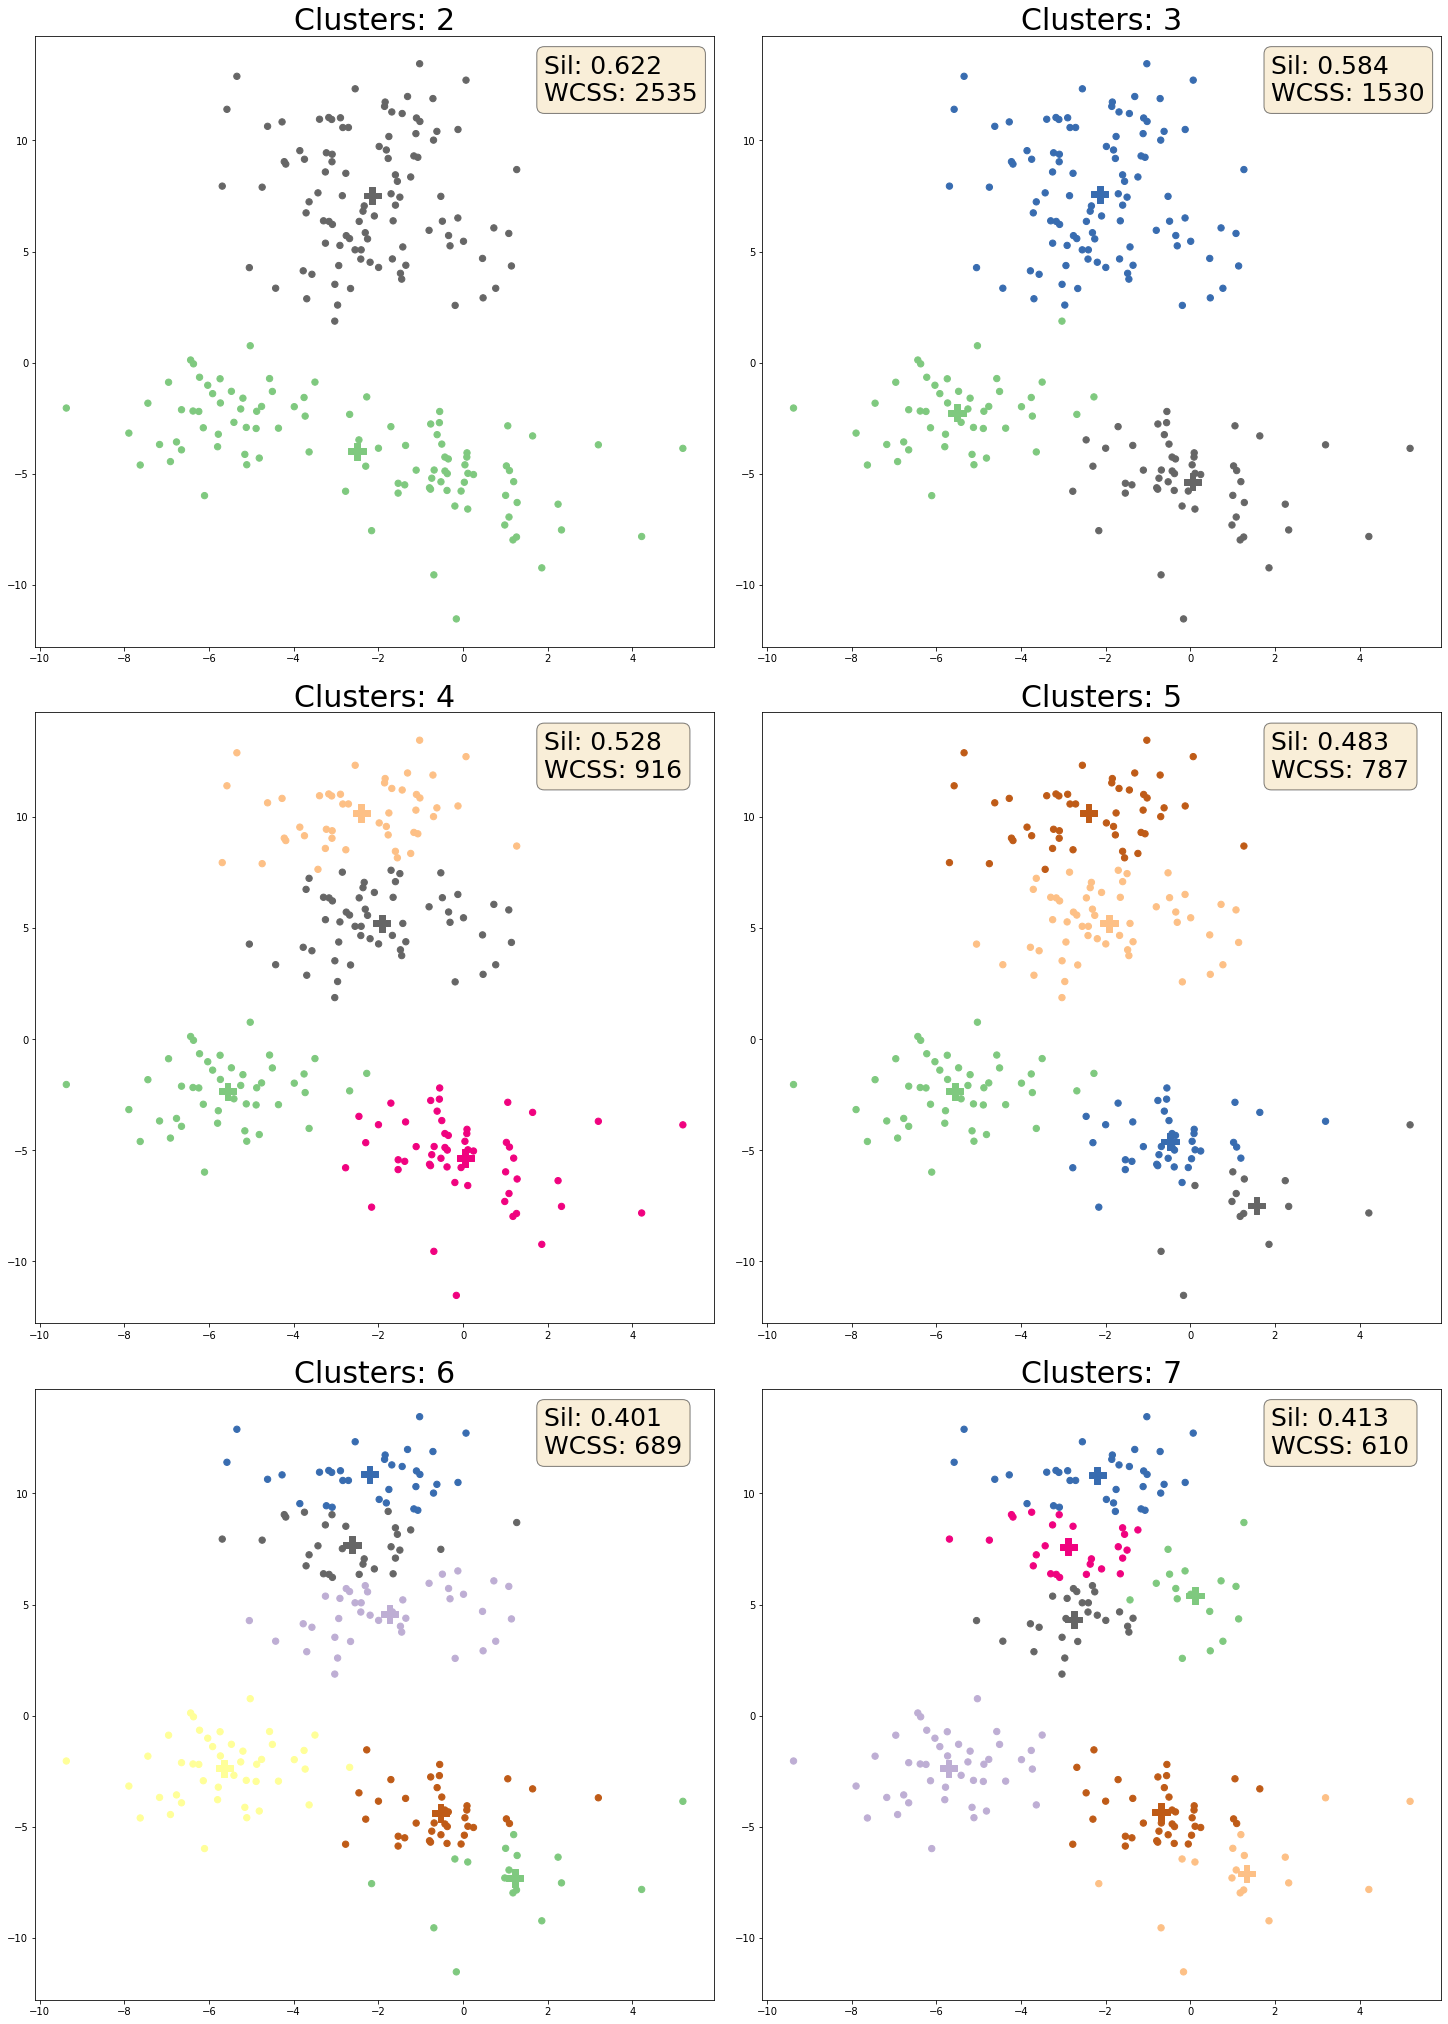

,Clusters,Silhouette(max),WCSS(min)
0,2,0.622334,2535.479916
0,3,0.583982,1530.233897
0,4,0.528068,916.395212
0,5,0.482599,787.010739
0,6,0.401168,689.400407
0,7,0.413017,610.374169


In [5]:
# validate number of clusters

max_n_clusters = 7

tab=pd.DataFrame(columns = ['Clusters', 'Silhouette(max)', 'WCSS(min)'], dtype=int).fillna('')
tab['Silhouette(max)']=tab['Silhouette(max)'].astype(float)

fig, ax = plt.subplots(math.ceil((max_n_clusters-1) / 2), 2, figsize=(20,max_n_clusters *4), constrained_layout=True)
ax=ax.flatten()
for i in range(max_n_clusters-1):
    
    nclust = i + 2
    sil, wcss, label, centroids = cluster_kmeans(X, nclust)
    tab=tab.append(pd.DataFrame([[nclust, sil, wcss]], columns=tab.columns))

    ax[i].scatter(X[:,0], X[:,1], c=label, cmap='Accent', s=40)
    ax[i].scatter(centroids[:,0], centroids[:,1], c=range(nclust), cmap='Accent', s=300, marker='P')
    ax[i].set_title('Clusters: ' + str(nclust), fontsize = 30)
    textstr = 'Sil: ' + str(round(sil, 3)) + '\nWCSS: ' + str(int(wcss))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[i].text(0.75, 0.97, textstr, transform=ax[i].transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.show()
display(tab)

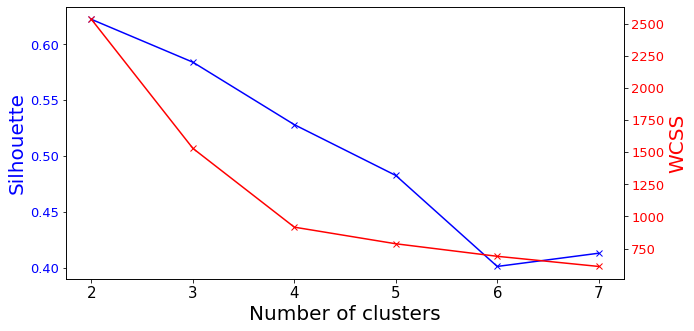

In [77]:
# determine optimal number of clusters with Elbow method

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(tab.Clusters, tab['Silhouette(max)'], 'bx-', color = 'blue')
ax1.set_xlabel('Number of clusters', fontsize = 20)
ax1.set_ylabel('Silhouette', fontsize = 20, color = 'blue')
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=13)

ax2 = ax1.twinx()
ax2.plot(tab.Clusters, tab['WCSS(min)'], 'bx-', color = 'red')
ax2.set_ylabel('WCSS', fontsize = 20, color = 'red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=13)

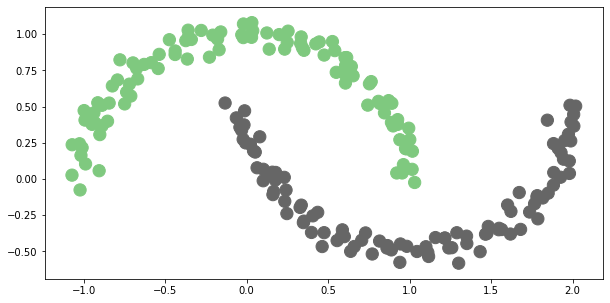

In [6]:
# k-Means is not the only clustering algo. Let's try DBSCAN
from sklearn.datasets import make_moons

X2, y2 = make_moons(200, noise=0.05, random_state=0)

plt.figure(figsize=(10,5))
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap='Accent', s=150)
plt.show()

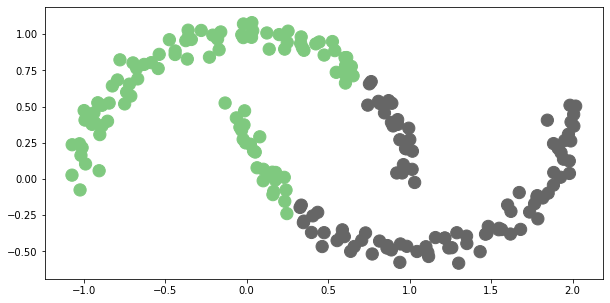

Silhouette: 0.49215648268306905
WCSS: 9158.543571314343


In [8]:
# run k-means
sil, wcss, label, centroid = cluster_kmeans(X2, 2)
plt.figure(figsize=(10,5))
plt.scatter(X2[:,0], X2[:,1], c=label, cmap='Accent', s=150)
plt.show()
print('Silhouette:', sil)
print('WCSS:', wcss)

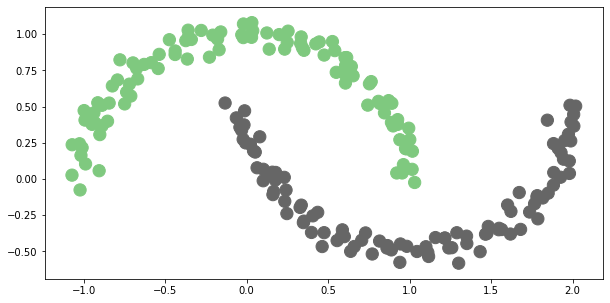

Silhouette: 0.32585318950197517
WCSS: (121.33995220480492, array([[-0.00518224,  0.63320099],
       [ 0.99814396, -0.12876755]]))


In [16]:
# try DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3).fit(X2)

label = db.labels_
sil=metrics.silhouette_score(X2, label, metric='euclidean', random_state=0)
wcss = eval_WCSS(X2, label)

plt.figure(figsize=(10,5))
plt.scatter(X2[:,0], X2[:,1], c=label, cmap='Accent', s=150)
plt.show()
print('Silhouette:', sil)
print('WCSS:', wcss)

# Hierarchical algorithms

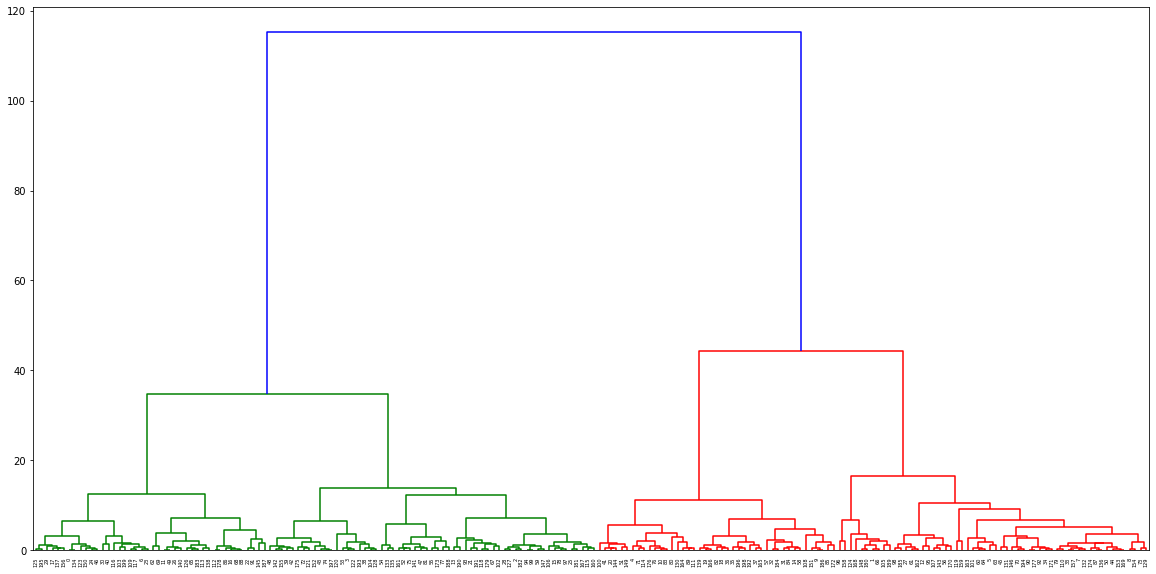

In [18]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# linkage references
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

# create dendrogram and explore number of clusters
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, metric='euclidean', method='ward'))

In [19]:
# create clusters

def cluster_agglom(df, nclust, link):

    hc = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = link).fit(df)
    label = hc.labels_
    wcss, centroids = eval_WCSS(X, label)
    sil=metrics.silhouette_score(df, label, metric='euclidean', random_state=0)

    return sil, wcss, label, centroids

cluster_agglom(X, 2, link='ward')

(0.6223344937334742,
 2535.4799159964823,
 array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1], dtype=int64),
 array([[-2.50123833, -3.98898514],
        [-2.14469133,  7.52336087]]))

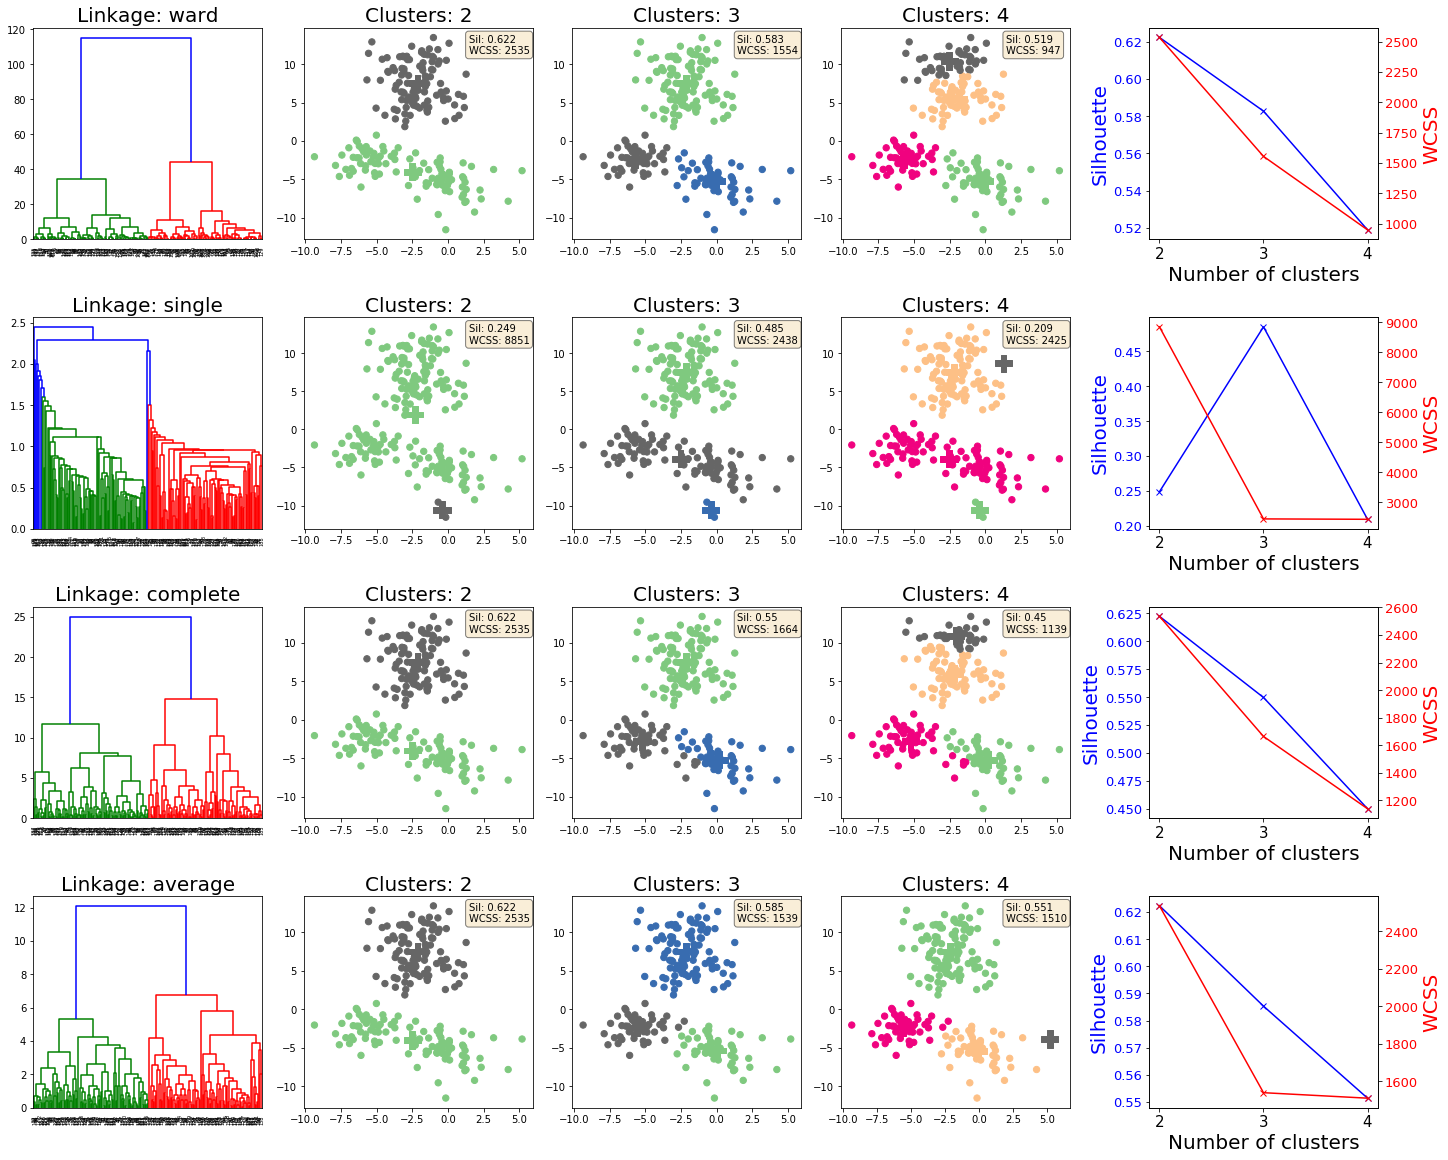

,Linkage,Clusters,Silhouette(max),WCSS(min)
0,ward,2,0.622334,2535.479916
0,ward,3,0.582708,1554.164754
0,ward,4,0.518837,947.946674
0,single,2,0.248716,8851.589100
0,single,3,0.485130,2438.984171
0,single,4,0.209243,2425.838952
0,complete,2,0.622334,2535.479916
0,complete,3,0.549666,1664.140497
0,complete,4,0.450108,1139.782374
0,average,2,0.622334,2535.479916


In [20]:
# validate number of clusters

max_n_clusters = 4
linkage_methods = ['ward', 'single', 'complete', 'average']

tab=pd.DataFrame(columns = ['Linkage', 'Clusters', 'Silhouette(max)', 'WCSS(min)'], dtype=int).fillna('')
tab['Linkage']=tab['Linkage'].astype(str)
tab['Silhouette(max)']=tab['Silhouette(max)'].astype(float)

fig, ax = plt.subplots(len(linkage_methods), max_n_clusters+1, figsize=(20,len(linkage_methods)*4), constrained_layout=True)
ax=ax.flatten()
i = 0
for link in linkage_methods:
    
    sch.dendrogram(sch.linkage(X, metric='euclidean', method=link), ax=ax[i])
    ax[i].set_title('Linkage: ' + link, fontsize = 20)
    i += 1
    
    for nclust in range(2, max_n_clusters+1):
    
        sil, wcss, label, centroids = cluster_agglom(X, nclust, link=link)
        tab=tab.append(pd.DataFrame([[link, nclust, sil, wcss]], columns=tab.columns))

        ax[i].scatter(X[:,0], X[:,1], c=label, cmap='Accent', s=40)
        ax[i].scatter(centroids[:,0], centroids[:,1], c=range(nclust), cmap='Accent', s=300, marker='P')
        ax[i].set_title('Clusters: ' + str(nclust), fontsize = 20)
        textstr = 'Sil: ' + str(round(sil, 3)) + '\nWCSS: ' + str(int(wcss))
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax[i].text(0.72, 0.97, textstr, transform=ax[i].transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
        i += 1
    
    # plot elbow
    tab_link = tab[tab.Linkage == link]
    ax1=ax[i]
    ax1.plot(tab_link.Clusters, tab_link['Silhouette(max)'], 'bx-', color = 'blue')
    ax1.set_xlabel('Number of clusters', fontsize = 20)
    ax1.set_ylabel('Silhouette', fontsize = 20, color = 'blue')
    ax1.tick_params(axis="x", labelsize=15)
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.tick_params(axis='y', labelcolor='blue', labelsize=13)
    ax2 = ax1.twinx()
    ax2.plot(tab_link.Clusters, tab_link['WCSS(min)'], 'bx-', color = 'red')
    ax2.set_ylabel('WCSS', fontsize = 20, color = 'red')
    ax2.tick_params(axis='y', labelcolor='red', labelsize=13)
    i += 1

plt.show()
display(tab)

# Real data

In [235]:
# http://archive.ics.uci.edu/ml/datasets/seeds

dataset = pd.read_csv('seeds.csv')
dataset.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [236]:
X = dataset.copy().drop(columns='Class')
y = dataset.copy().Class

Explained variance: 99.0 %


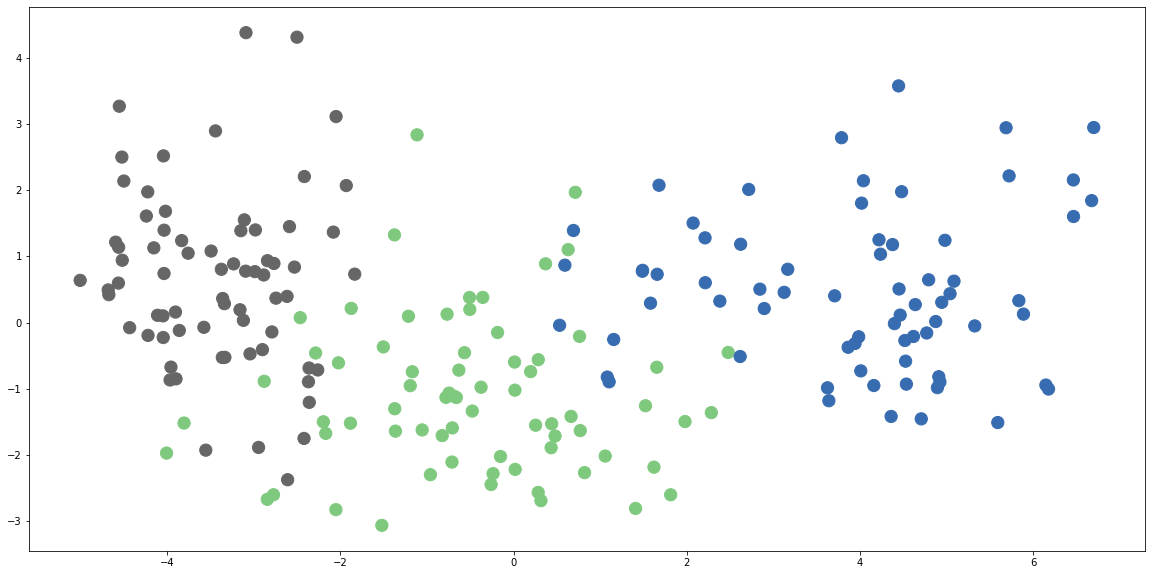

In [240]:
# we cannot plot the data so we use a dimensionality reduction technique called Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0).fit(X)
scores = pca.transform(X)
print('Explained variance:', round(sum(pca.explained_variance_ratio_)*100), '%')

# plot data
plt.figure(figsize=(20,10))
plt.scatter(scores[:,0], scores[:,1], c=y, cmap='Accent', s=150)
plt.show()

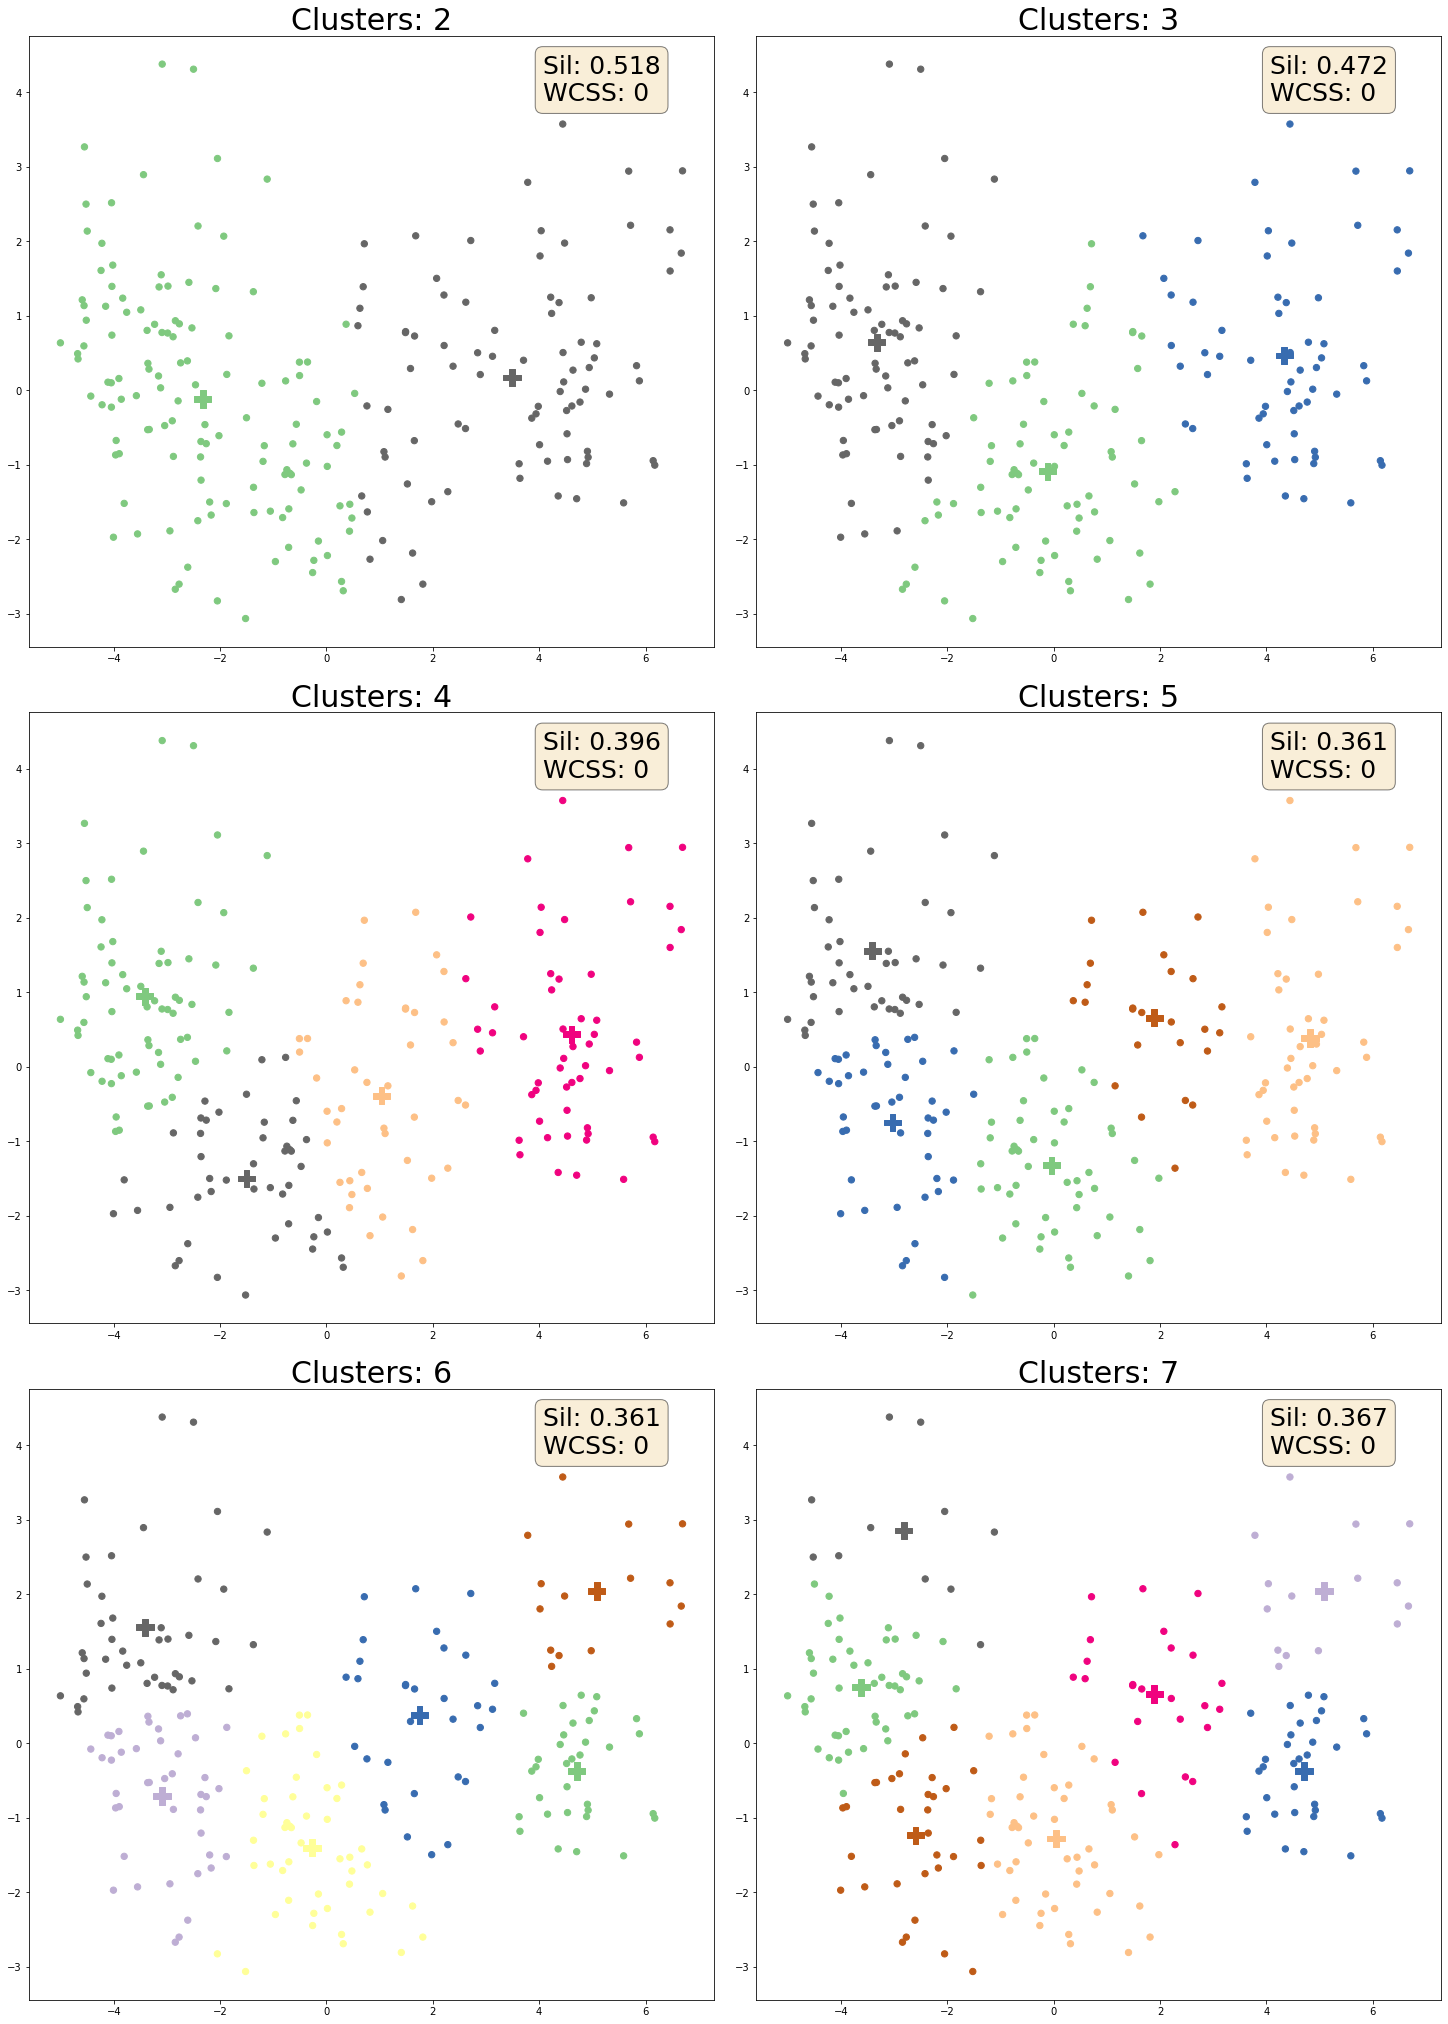

,Clusters,Silhouette(max),WCSS(min)
0,2,0.518287,2.191216e-25
0,3,0.471934,6.155247e-26
0,4,0.396465,2.952349e-26
0,5,0.361323,1.942715e-26
0,6,0.361271,1.351823e-26
0,7,0.367379,1.345556e-26


In [246]:
# validate number of clusters - we evaluate clusters on X and plot scores

max_n_clusters = 7

tab=pd.DataFrame(columns = ['Clusters', 'Silhouette(max)', 'WCSS(min)'], dtype=int).fillna('')
tab['Silhouette(max)']=tab['Silhouette(max)'].astype(float)
label_list={}

fig, ax = plt.subplots(math.ceil((max_n_clusters-1) / 2), 2, figsize=(20,max_n_clusters *4), constrained_layout=True)
ax=ax.flatten()
for i in range(max_n_clusters-1):
    
    nclust = i + 2
    sil, wcss, label, _ = cluster_kmeans(X, nclust)
    df = pd.DataFrame(data=scores,index=label)
    centroids = df.groupby(level=0).mean().values
    tab=tab.append(pd.DataFrame([[nclust, sil, wcss]], columns=tab.columns))
    label_list[str(nclust)]=label

    ax[i].scatter(scores[:,0], scores[:,1], c=label, cmap='Accent', s=40)
    ax[i].scatter(centroids[:,0], centroids[:,1], c=range(nclust), cmap='Accent', s=300, marker='P')
    ax[i].set_title('Clusters: ' + str(nclust), fontsize = 30)
    textstr = 'Sil: ' + str(round(sil, 3)) + '\nWCSS: ' + str(int(wcss))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[i].text(0.75, 0.97, textstr, transform=ax[i].transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.show()
display(tab)

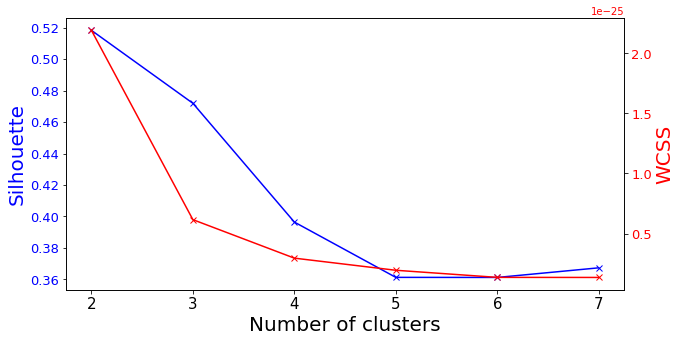

In [245]:
# determine optimal number of clusters with Elbow method

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(tab.Clusters, tab['Silhouette(max)'], 'bx-', color = 'blue')
ax1.set_xlabel('Number of clusters', fontsize = 20)
ax1.set_ylabel('Silhouette', fontsize = 20, color = 'blue')
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=13)

ax2 = ax1.twinx()
ax2.plot(tab.Clusters, tab['WCSS(min)'], 'bx-', color = 'red')
ax2.set_ylabel('WCSS', fontsize = 20, color = 'red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=13)

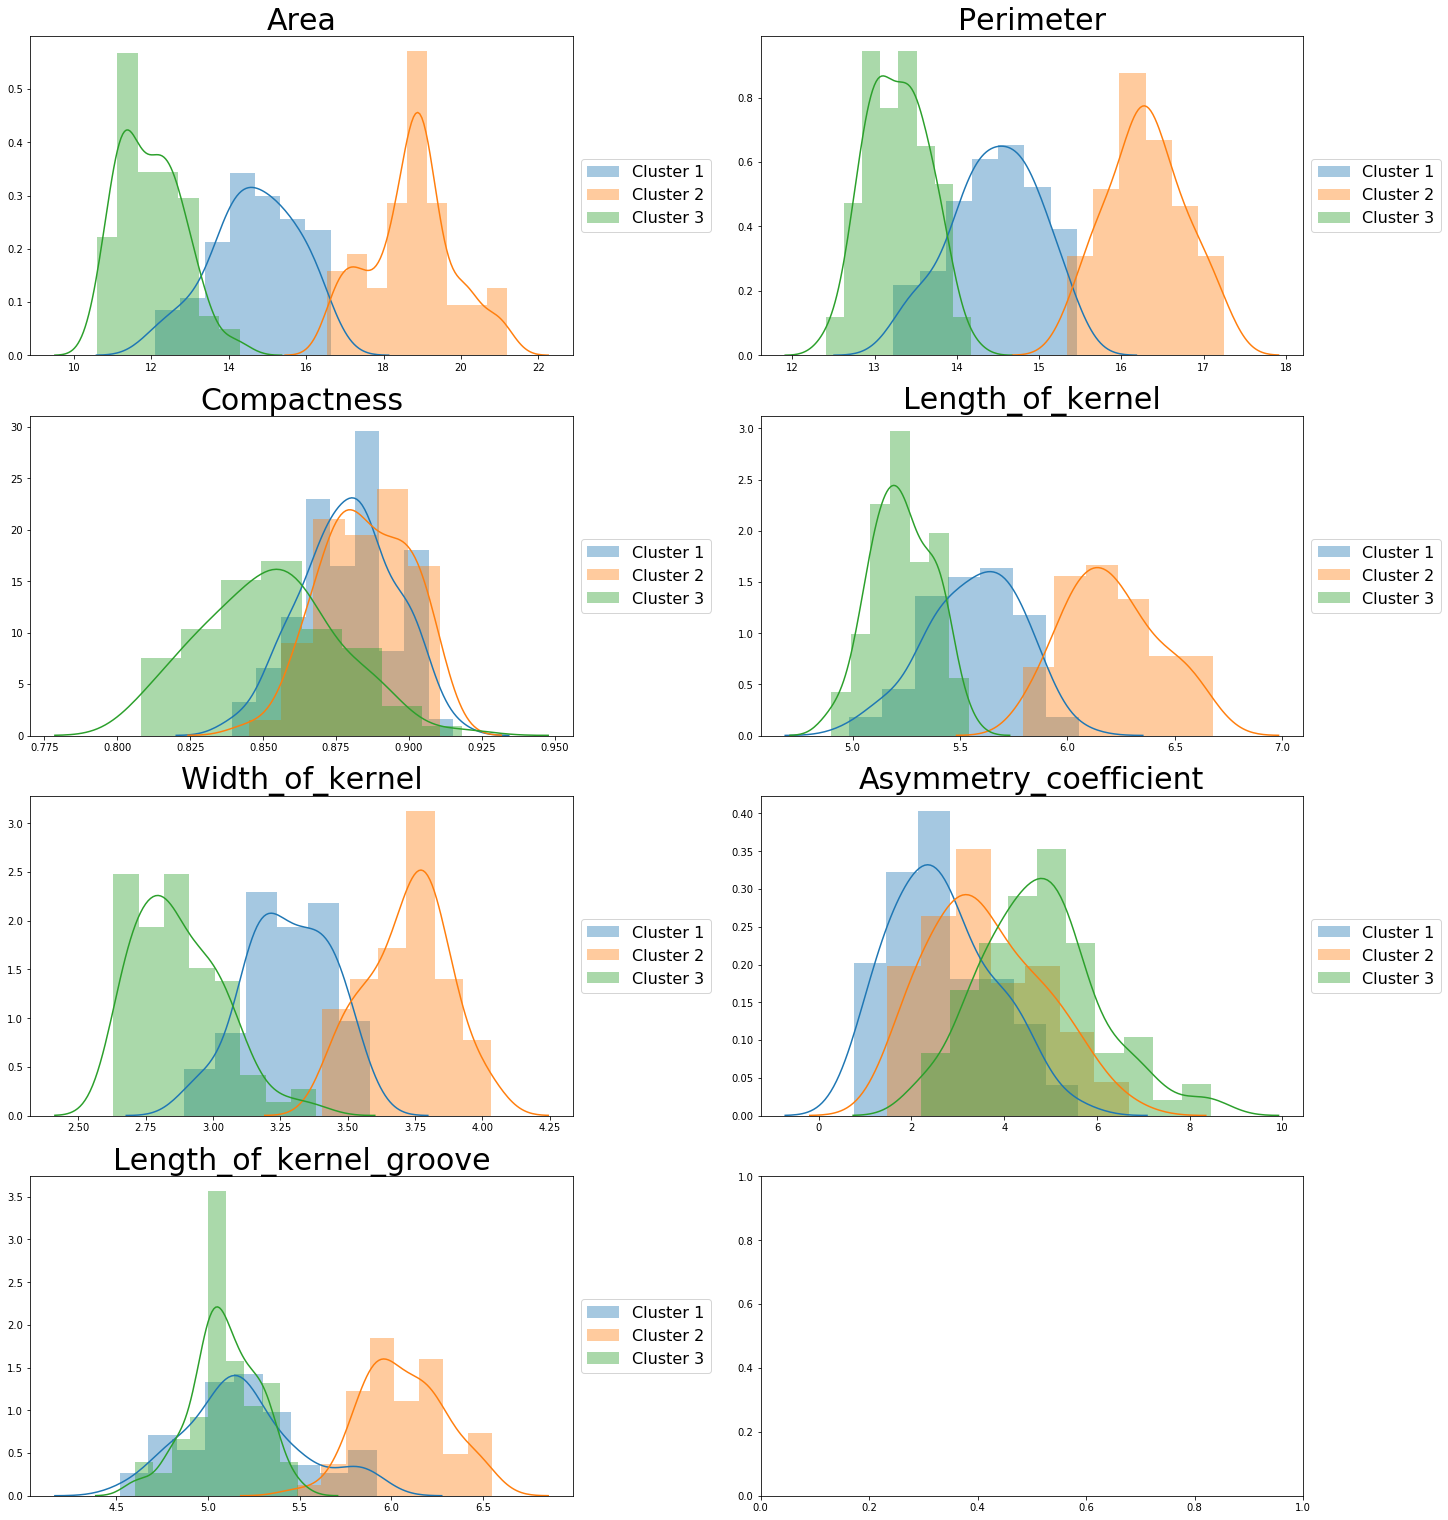

In [297]:
# inspect clusters' features

number_of_clusters = 3


label = label_list[str(number_of_clusters)]
fig, ax = plt.subplots(math.ceil(X.shape[1] / 2), 2, figsize=(20,math.ceil(X.shape[1] / 3)*7), constrained_layout=True)
ax=ax.flatten()
from sklearn import preprocessing
X_labels=pd.DataFrame(data=X.values, index=label, columns=X.columns)
i=0

for var in X_labels.columns:
    
    for clust in range(number_of_clusters):

        df = X_labels.copy()[X_labels.index == clust]
        sns.distplot(df[var], ax=ax[i], norm_hist=True, label='Cluster ' + str(clust+1), hist_kws=dict(alpha=0.4))
        ax[i].set_title(var, fontsize=30)
        ax[i].set_xlabel('')
        ax[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=16)
  
    i += 1
